In [1]:
%matplotlib inline

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, make_circles

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC

# Support Vector Machines
## Live Demos

In [4]:
iris_attributes, iris_classes = load_iris().data, load_iris().target

In [5]:
iris_attributes.shape

(150, 4)

In [18]:
iris_attributes_train, iris_attributes_test, iris_classes_train, iris_classes_test = train_test_split(
    iris_attributes, iris_classes, train_size = 0.7, stratify = iris_classes)

In [19]:
iris_attributes_train.shape

(105, 4)

In [20]:
iris_attributes_test.shape

(45, 4)

In [25]:
svm = LinearSVC(C = 10)

In [26]:
svm.fit(iris_attributes_train, iris_classes_train)

C:\Users\Yordan\Anaconda3\envs\tf2\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=10)

In [27]:
svm.score(iris_attributes_train, iris_classes_train)

0.9047619047619048

In [28]:
svm.score(iris_attributes_test, iris_classes_test)

0.9111111111111111

In [59]:
gaussian_svm = SVC(C = 0.0001)

In [60]:
gaussian_svm.fit(iris_attributes_train, iris_classes_train)

SVC(C=0.0001, gamma=2e-05)

In [61]:
gaussian_svm.score(iris_attributes_train, iris_classes_train)

0.9238095238095239

In [62]:
gaussian_svm.score(iris_attributes_test, iris_classes_test)

0.9111111111111111

In [74]:
circles_data, circles_classes = make_circles(1000, noise = 0.05, factor = 0.5)

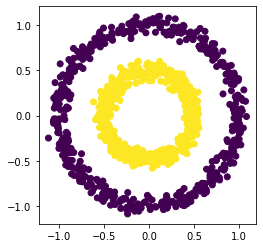

In [141]:
plt.gca().set_aspect("equal")
plt.scatter(circles_data[:, 0], circles_data[:, 1], c = circles_classes)

In [76]:
circles_data_train, circles_data_test, circles_classes_train, circles_classes_test = train_test_split(
    circles_data, circles_classes, train_size = 0.8)

In [85]:
svm_circles = LinearSVC(C = 1e9)

In [86]:
svm_circles.fit(circles_data_train, circles_classes_train)

C:\Users\Yordan\Anaconda3\envs\tf2\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1000000000.0)

In [87]:
svm_circles.score(circles_data_train, circles_classes_train)

0.5575

In [88]:
svm_circles.score(circles_data_test, circles_classes_test)

0.505

In [137]:
svm_circles_gaussian = SVC(kernel = "rbf", C = 100)

In [138]:
svm_circles_gaussian.fit(circles_data_train, circles_classes_train)

SVC(C=100)

In [139]:
svm_circles_gaussian.score(circles_data_train, circles_classes_train)

1.0

In [140]:
svm_circles_gaussian.score(circles_data_test, circles_classes_test)

1.0

In [142]:
def fit_and_score(estimator, train_X, train_y, test_X, test_y):
    estimator.fit(train_X, train_y)
    print("Train score: {}".format(estimator.score(train_X, train_y)))
    print("Test score: {}".format(estimator.score(test_X, test_y)))    

In [144]:
fit_and_score(svm_circles, circles_data_train, circles_classes_train, circles_data_test, circles_classes_test)

Train score: 0.4925
Test score: 0.53


C:\Users\Yordan\Anaconda3\envs\tf2\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [145]:
fit_and_score(svm_circles_gaussian, circles_data_train, circles_classes_train, circles_data_test, circles_classes_test)

Train score: 1.0
Test score: 1.0


In [146]:
fit_and_score(svm, iris_attributes_train, iris_classes_train, iris_attributes_test, iris_classes_test)

Train score: 0.9714285714285714
Test score: 1.0


C:\Users\Yordan\Anaconda3\envs\tf2\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [155]:
logistic_regression_circles = LogisticRegression(C = 1e9)

In [156]:
fit_and_score(logistic_regression_circles, circles_data_train, circles_classes_train, circles_data_test, circles_classes_test)

Train score: 0.4675
Test score: 0.39


In [158]:
circles_data_poly = PolynomialFeatures(degree = 2).fit_transform(circles_data)

In [162]:
circles_data_poly_train, circles_data_poly_test, circles_classes_poly_train, circles_classes_poly_test = train_test_split(circles_data_poly, circles_classes, train_size = 0.8)

In [166]:
circles_data_poly_train.shape

(800, 6)

In [164]:
circles_classes_poly_train.shape

(800,)

In [167]:
fit_and_score(
    logistic_regression_circles,
    circles_data_poly_train,
    circles_classes_poly_train,
    circles_data_poly_test,
    circles_classes_poly_test)

Train score: 1.0
Test score: 1.0
